### MODEL 5: LINEAR REGRESSION (C)

Linear Regression after preprocessing the data and using all the features.

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

train=pd.read_csv('/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab Assignment 9-10-20/Question1/DataSet2/train_dataset.csv')
test=pd.read_csv('/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab Assignment 9-10-20/Question1/DataSet2/test_dataset.csv')

#Preproccessing The missing data

#Item_Visibility: There are values where zero is present, so we replace those zeros with the mean of the 
# rest of the values
m=train.Item_Visibility.mean()
train['Item_Visibility']=train['Item_Visibility'].replace(0,m)

#Outlet_Establishment_Year: Since there are a wide range of values present we take the values under a common
# denominator and subract the entire value from 2013. Since the highest value is 2009 this should 
# give us workable values without negatives

max(train.Outlet_Establishment_Year)

train.Outlet_Establishment_Year=2013-train["Outlet_Establishment_Year"]

#Outlet_Size: Contain several empty entries, using pd.fillna() to make those values 'small'(USING unknown asssumption)

train['Outlet_Size'].fillna('Small',inplace=True)
train.Outlet_Size

# Since there are a lot of categorical variable we extract[Using: pd.df.select_dtypes() function to 
# select the objects] these features to make them into indicator variables
# using the pd.get_dummies() function

#1. Extracting the object type and making it into a list
s=train.select_dtypes(include='object')
mylist=list(s)
#2. Converting into Dummy or Indicator Variables for EACH column in my list
dummies = pd.get_dummies(train[mylist], prefix= mylist)

# Dropping the previous object type list 
train.drop(mylist, axis=1, inplace = True)

# Adding our new dummies to the train set
X1 = pd.concat([train,dummies], axis =1 )

#PREPROCESSING COMPLETE






In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab Assignment 9-10-20/Question1/DataSet1/train1.csv')
test = pd.read_csv('/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab Assignment 9-10-20/Question1/DataSet1/test1.csv')

# importing linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

# for cross validation
from sklearn.model_selection import train_test_split
X = train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
lreg.fit(x_train,y_train)

# predicting on cv
pred_cv = lreg.predict(x_cv)

# calculating mse
mse = np.mean((pred_cv - y_cv)**2)

mse
# evaluate using r-square

lreg.score(x_cv,y_cv)





0.4763907768927744

Text(0.5, 1.0, 'Residual plot VS Fitted Values')

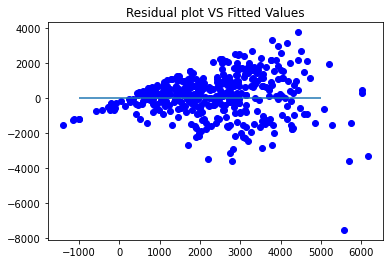

In [8]:
#Plotting Heteroskedasticity which is the presence of non-constant 
#variance in the error terms. Indicating the presence of variables which get too much
#weight and affect the model.
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot VS Fitted Values')



<AxesSubplot:title={'center':'Modal Coefficients'}>

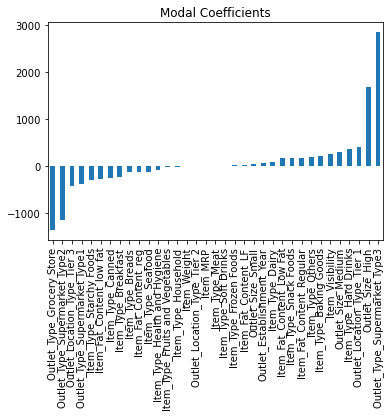

In [9]:

#checking the magnitude of coefficients
predictors = x_train.columns

# Using pd.Series() to produce a one dimensional array to show the axis labels
# and .sort_values() to sort them in ascending order to see the labels which closely related to the target variable
coef = pd.Series(lreg.coef_,predictors).sort_values()


coef.plot(kind='bar', title='Modal Coefficients')
